In [297]:
import os
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import pandas as pd

import wave
import librosa
from pydub import AudioSegment
from pydub.playback import play

## fetch data

In [369]:
DATA_FOLDER = "audibles"
CURRENT_DIR = os.getcwd()
FOLDER_PATH = os.path.join(CURRENT_DIR, DATA_FOLDER)
AUDIBLES = ['Daniel.wav', 'good-afternoon.wav', 'Jakub.wav', 
           'LudvigElevator.wav', 'Richard.wav', 'good-morning_lei.wav']

print(FOLDER_PATH)

C:\Users\xianl_pmrkzzf\SpeechRecognition\Speaker-Identification\audibles


In [372]:
def fetch_voice_data(url=FOLDER_PATH, folder=DATA_FOLDER): 
    audios = []
    for audio in os.listdir(url):
        if audio.endswith('.wav'):
            audios.append(os.path.join(folder, audio))
    return audios

audibles = fetch_voice_data()
print(len(audios))

6


In [373]:
def get_audibles(folder=DATA_FOLDER, audios=AUDIBLES):
    audibles = []
    for ele in audios:
        path = os.path.join(folder, ele) 
        audibles.append(path)
    return audibles

In [357]:
def get_audio_stats(audio):
    wav = wave.open(audio)
    print(f"channels: {wav.getnchannels()}")
    print(f"sample rate: {wav.getframerate()}")
    print(f"frames: {wav.getnframes()}")
    print(f"sample width: {wav.getsampwidth()}")
    print(f"duration: {wav.getnframes()/wav.getframerate()}")


In [374]:
get_audio_stats(audibles[1])

channels: 2
sample rate: 48000
frames: 166144
sample width: 2
duration: 3.461333333333333


## using pydub AudioSegment

In [359]:
def get_audios_stats(audios):
    for audio in audios:
        signal = AudioSegment.from_file(audio)  
        channels = signal.channels
        sample_rate = signal.frame_rate
        sample_width = signal.sample_width
        length_ms = len(signal)
        frame_width = signal.frame_width
        print(f'{audio}\nchannels: {channels}, sample_rate: {sample_rate}, \
        \nsample_width: {sample_width}, length: {length_ms}, frame_width: {frame_width}\n')

In [360]:
get_audios_stats(audibles)

voice_data\Daniel.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 97003, frame_width: 4

voice_data\good-afternoon.wav
channels: 2, sample_rate: 48000,         
sample_width: 2, length: 3461, frame_width: 4

voice_data\Jakub.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 77530, frame_width: 4

voice_data\LudvigElevator.wav
channels: 2, sample_rate: 48000,         
sample_width: 2, length: 63104, frame_width: 4

voice_data\Richard.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 101829, frame_width: 4

voice_data\good-morning_lei.wav
channels: 2, sample_rate: 44100,         
sample_width: 2, length: 1347, frame_width: 4



## visulize some data for observing

44100
(4277846, 2)


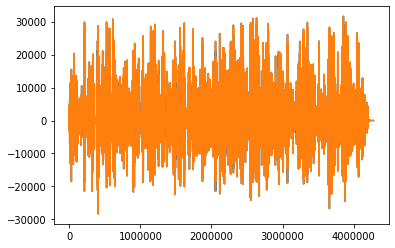

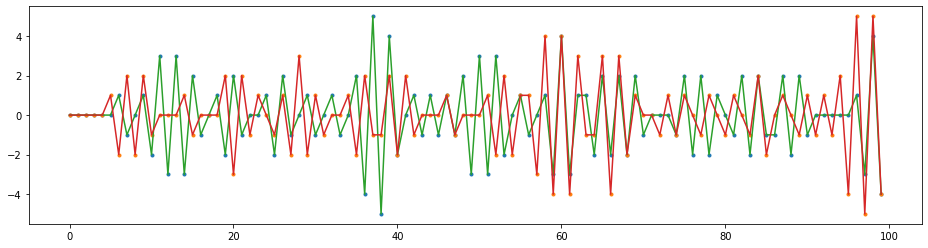

In [365]:
from scipy.io import wavfile

def plot_audio_frames(audio): 
    file = audibles[0]
    rate, data = wavfile.read(file)
    print(rate)
    print(data.shape)
    plt.plot(data, '-')
    plt.figure(figsize=(16, 4))
    plt.plot(data[:100], '.'); 
    plt.plot(data[:100], '-');

plot_audio_frames(audibles[5])

## pre-processing data by using Librosa

In [362]:
## change the sample rate and channels of all audios to the same 
## add label of names
## chunk each audio to 0.01s
## each 0.01s is an array
## each audio is a dataframe

def transform_audios(audios=audibles):
    audios_df = []
    for audio in audibles:
        samples, sample_rate = librosa.load(audio, sr=44100, mono=True, duration=1.0, dtype=np.float32)
        samples = samples.reshape(100, 441)
        name = os.path.split(audio)[1].split('.')[0]
        label = np.full((100,), name)
        samples_df = pd.DataFrame(samples)
        samples_df[len(samples_df.columns)] = label
        audios_df.append(samples_df)
    return audios_df

In [364]:
audios_df = transform_audios()
audios_df[5]

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
0,-0.000381,-0.000412,-0.000595,-0.000504,-0.000504,-0.000381,-0.000137,-0.000320,-0.000290,-0.000443,...,-0.000381,-0.000275,-0.000107,-0.000259,-0.000305,-0.000534,-0.000671,-0.000549,-0.000473,good-morning_lei
1,-0.000244,-0.000168,-0.000214,-0.000153,-0.000168,0.000000,0.000076,0.000061,0.000015,-0.000092,...,0.001328,0.000961,0.000916,0.000565,0.000732,0.000641,0.000717,0.000595,0.000473,good-morning_lei
2,0.000351,0.000305,0.000427,0.000458,0.000473,0.000443,0.000336,0.000412,0.000443,0.000381,...,-0.001480,-0.001968,-0.002502,-0.003006,-0.003571,-0.003876,-0.004181,-0.004074,-0.003784,good-morning_lei
3,-0.003464,-0.002991,-0.002731,-0.002350,-0.001892,-0.001434,-0.000778,-0.000336,0.000107,0.000443,...,0.009064,0.007706,0.006363,0.005402,0.004715,0.004349,0.003418,0.001953,-0.000443,good-morning_lei
4,-0.003525,-0.006729,-0.009705,-0.011688,-0.012619,-0.012436,-0.011856,-0.011154,-0.011063,-0.011246,...,-0.000748,-0.000580,-0.000198,0.000092,0.000275,0.000519,0.000519,0.000717,0.000595,good-morning_lei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003922,0.003937,0.003845,0.003738,0.003357,0.003265,0.002899,0.003021,0.002792,0.002930,...,-0.002289,-0.002167,-0.002121,-0.001999,-0.002014,-0.001938,-0.001892,-0.001831,-0.001907,good-morning_lei
96,-0.002136,-0.002045,-0.002106,-0.001801,-0.001678,-0.001724,-0.001801,-0.002228,-0.002213,-0.002243,...,0.004028,0.004364,0.004395,0.004257,0.004089,0.003967,0.004135,0.004196,0.004349,good-morning_lei
97,0.004089,0.004013,0.003586,0.003448,0.003021,0.002686,0.002029,0.001480,0.001022,0.000809,...,-0.000702,-0.000778,-0.000900,-0.001099,-0.001160,-0.001511,-0.001541,-0.001785,-0.001846,good-morning_lei
98,-0.001785,-0.001816,-0.001648,-0.001663,-0.001450,-0.001328,-0.000961,-0.000702,-0.000473,-0.000549,...,0.001038,0.001007,0.001114,0.001007,0.001129,0.001266,0.001526,0.001999,0.002213,good-morning_lei


## experiment area

In [352]:
x = np.array([])
zz = np.arange(15).reshape(3, 5)
print(zz)
df = pd.DataFrame(zz)
df


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [211]:
df.head()
z = np.arange(3)
z
df[len(df.columns)] = z
df

,0,1,2,3,4,5
0,0,1,2,3,4,0
1,5,6,7,8,9,1
2,10,11,12,13,14,2


## using pydub AudioSegment

In [366]:
def trim_audios_1s(audios=audibles):
    audibles_1s = []
    for ele in audios:
        audio = AudioSegment.from_file(ele) 
        audio_seg = audio[:1000]
        if audio_seg.channels != 1:
            audio_seg = audio_seg.set_channels(1)
        if audio_seg.frame_rate != 44100:
            audio_seg = audio_seg.set_frame_rate(44100) 
        audibles_1s.append(audio_seg)
    return audibles_1s

<class 'pydub.audio_segment.AudioSegment'>
44100
(4277846, 2)


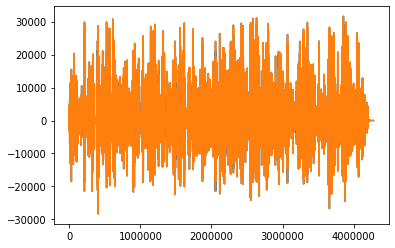

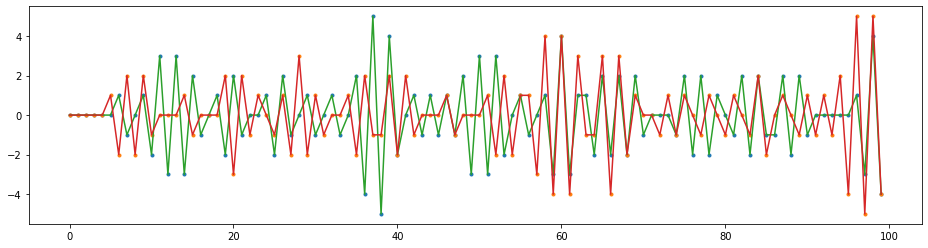

In [368]:
# get the 1s of the selected audios
audibles_1s = get_1s_audios()
print(type(audibles_1s[2]))
plot_audio_frames(audibles_1s[5])

In [79]:
au = audibles_1s[0].set_sample_width(1)
play(au)


In [55]:
audibles_1s[0].channels

2

In [7]:
## using pydub

def get_file_stats(file_name):
    audio_segment = AudioSegment.from_file(file_name)
    
    channels = audio_segment.channels
    sample_width = audio_segment.sample_width
    sample_rate = audio_segment.frame_rate
    frame_width = audio_segment.frame_width
    length_ms = len(audio_segment)
    
    audio_stats = [file_name, channels, sample_width, sample_rate,
                           frame_width, length_ms]
    
    print(file_name)
    print(f"Channels: {audio_segment.channels}")
    print(f"Sample width: {audio_segment.sample_width}")
    print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
    print(f"Frame width: {audio_segment.frame_width}")
    print(f"Length (ms): {len(audio_segment)}")

    return audio_stats

In [8]:
audio_stats = get_file_stats(audios[0])
audio_stats

voice_data\Daniel.wav
Channels: 2
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 4
Length (ms): 97003


['voice_data\\Daniel.wav', 2, 2, 44100, 4, 97003]

In [22]:
def process_audio(audios):
    for audio in audios:
        print(audio)
        audio_c = AudioSegment.from_file(audio)
        sample = audio_c[500:1500]
        play(sample)
        sleep(1)
#        audio_stats = get_file_stats(audio_c)

In [24]:
process_audio(audios)


voice_data\Daniel.wav
voice_data\good-afternoon.wav
voice_data\good-morning-lars.wav
voice_data\good-morning-lei.wav
voice_data\good-morning.wav
voice_data\Jakub.wav
voice_data\loud_quiet.wav
voice_data\LudvigElevator.wav
voice_data\Richard.wav


## enumerate example

In [6]:
labels = ["a", "b", "c"]

In [9]:
label_x = {label: i for i, label in enumerate(labels)}

In [10]:
label_x

{'a': 0, 'b': 1, 'c': 2}

## using Librosa to calculate mfcc

In [140]:
SAMPLE_RATE = 44100
fname = "voice_data/good-morning.wav"
wav, _ = librosa.core.load(fname, sr=SAMPLE_RATE)
#wav = wav[:2*48000]

In [141]:
mfcc = librosa.feature.mfcc(wav, sr=SAMPLE_RATE, n_mfcc=40)
mfcc.shape

(40, 225)

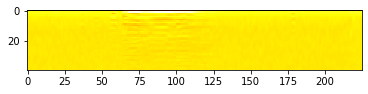

In [142]:
plt.imshow(mfcc, cmap='hot', interpolation='nearest')

In [143]:
def get_mfcc(file_name, sample_rate):
    SAMPLE_RATE = 48000
    wav, _ = librosa.core.load(file_name, sr=sample_rate)
## don't know if this should be include and why
    #wav = wav[:2*48000]
    mfcc = librosa.feature.mfcc(wav, sr=SAMPLE_RATE, n_mfcc=40)
    print(f"'{file_name}' has mfcc {mfcc.shape}")
    return mfcc

In [144]:
get_mfcc(fname, SAMPLE_RATE)

'voice_data/good-morning.wav' has mfcc (40, 225)


array([[-5.86017383e+02, -5.82018724e+02, -5.79057244e+02, ...,
        -5.75888597e+02, -5.69499061e+02, -5.70467853e+02],
       [ 4.52159254e+01,  4.93551781e+01,  5.12348332e+01, ...,
         5.70118026e+01,  6.38515612e+01,  6.17062717e+01],
       [ 3.84782119e+01,  3.92341400e+01,  3.68053987e+01, ...,
         4.42968048e+01,  4.66626254e+01,  4.26868016e+01],
       ...,
       [-2.84900420e+00, -3.56308486e+00, -2.06189576e+00, ...,
        -3.71338367e-01,  1.19847609e+00,  2.20888862e+00],
       [-4.57284185e+00, -5.13661803e+00, -5.47778387e+00, ...,
        -1.18202469e+00,  8.00111264e-01,  1.79729119e+00],
       [-5.63883624e+00, -5.71410554e+00, -6.24798063e+00, ...,
        -1.46778510e+00, -1.02817877e+00, -2.17955067e+00]])